In [1]:
import imblearn
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox

In [2]:
df = pd.read_csv("contributors2.csv")
selected_columns = ['is_core', 'repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio']

# Subset the DataFrame based on the selected columns
c3 = df[selected_columns].copy()
#get projects not in cluster
#c3_cols = ['umijs/umi', 'netbox-community/netbox', 'grafana/loki', 'awsdocs/aws-doc-sdk-examples', 'vueuse/vueuse',
     #'yuzu-emu/yuzu', 'TanStack/query', 'lvgl/lvgl', 'arendst/Tasmota', 'Aircoookie/WLED']
#combine into one list
#c3 = c3[c3['name_with_owner'].isin(c3_cols)]
#c3 = c3.drop(columns = 'name_with_owner')

In [3]:
c3

,is_core,repos,gists,followers,following,months_experience,has_bio
0,0,90,5,450,67,115.45,1
1,0,88,14,2685,7,151.54,1
2,0,102,72,42,0,166.86,0
3,0,37,15,11,10,152.46,1
4,0,50,1,58,17,137.50,1
...,...,...,...,...,...,...,...
8439,0,19,0,5,1,126.98,0
8440,0,0,0,0,0,28.65,0
8441,0,1,1,13,3,124.58,1
8442,0,0,0,0,0,9.54,0


In [4]:
X = c3.drop(columns = 'is_core')
y = c3['is_core']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [5]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [6]:
train_df

,repos,gists,followers,following,months_experience,has_bio,is_core
3728,141,39,70,70,158.66,1,0
4991,71,0,47,71,40.24,1,0
3355,7,0,3,4,81.25,1,0
1246,26,0,1441,2,105.18,1,1
3116,3,0,0,0,124.11,0,0
...,...,...,...,...,...,...,...
4373,25,4,5,8,69.47,1,0
7891,1,0,1,0,113.60,0,0
4859,44,2,8,17,153.59,0,0
3264,21,0,0,0,74.29,0,0


In [7]:
print(train_df['is_core'].value_counts())
print(test_df['is_core'].value_counts())

0    6480
1     275
Name: is_core, dtype: int64
0    1605
1      84
Name: is_core, dtype: int64


In [8]:
adasyn = imblearn.over_sampling.ADASYN(random_state = 0)
x_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train, y_train)
c3_train = pd.DataFrame(data=x_resampled_adasyn, columns=['repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio'])  # Replace column names as needed
c3_train['is_core'] = y_resampled_adasyn  # Assuming 'target' is the name of your target column
c3_train['has_bio'] = c3_train['has_bio'].apply(lambda x: 1 if x >= 0.5 else 0)
c3_train

,repos,gists,followers,following,months_experience,has_bio,is_core
0,141,39,70,70,158.660000,1,0
1,71,0,47,71,40.240000,1,0
2,7,0,3,4,81.250000,1,0
3,26,0,1441,2,105.180000,1,1
4,3,0,0,0,124.110000,0,0
...,...,...,...,...,...,...,...
12920,23,0,5,0,116.698096,0,1
12921,24,1,7,0,115.677058,0,1
12922,27,4,10,0,114.785903,1,1
12923,26,3,9,0,114.744561,0,1


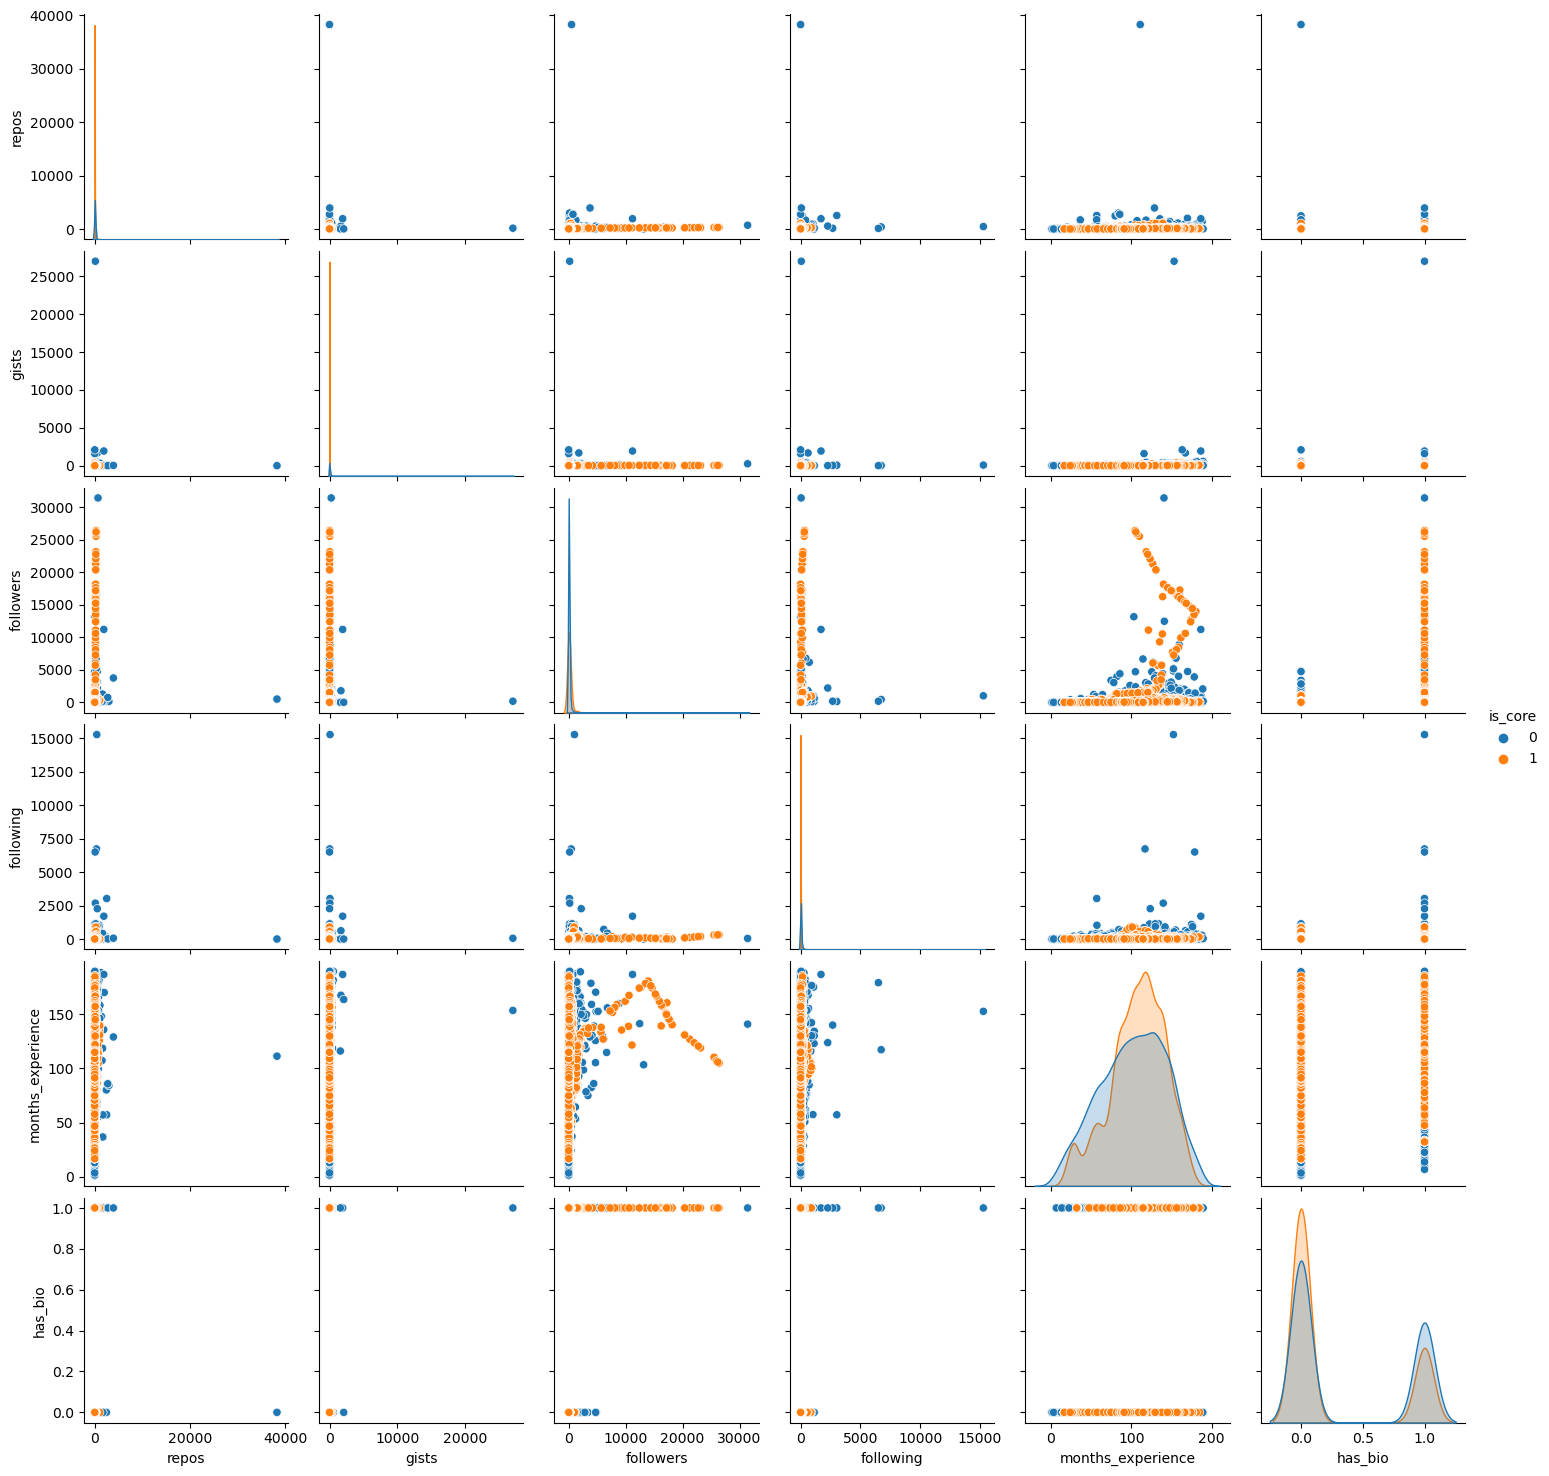

In [9]:
sns.pairplot(c3_train, hue = 'is_core')

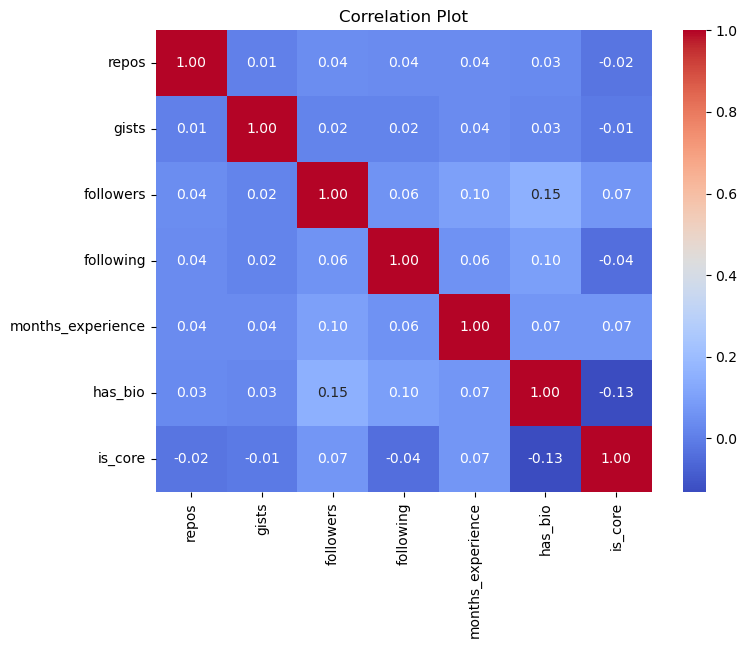

In [10]:
# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(c3_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

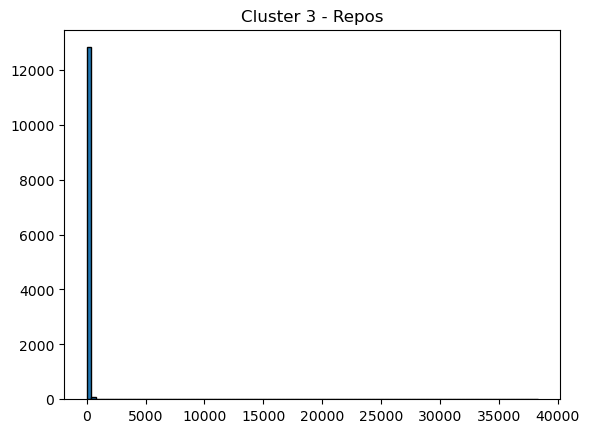

In [11]:
plt.hist(c3_train.repos, bins=100, edgecolor='black')
plt.title('Cluster 3 - Repos')
plt.show()

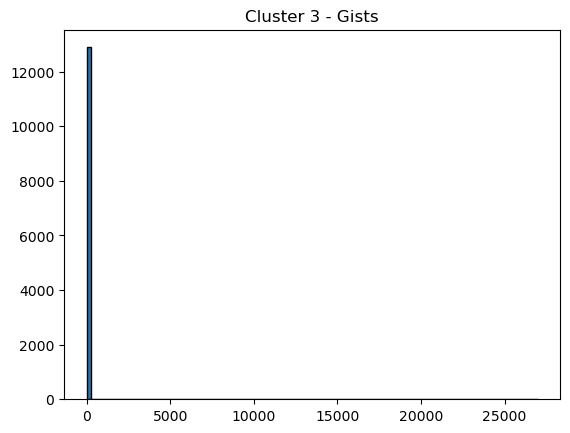

In [12]:
plt.hist(c3_train.gists, bins=100, edgecolor='black')
plt.title('Cluster 3 - Gists')
plt.show()

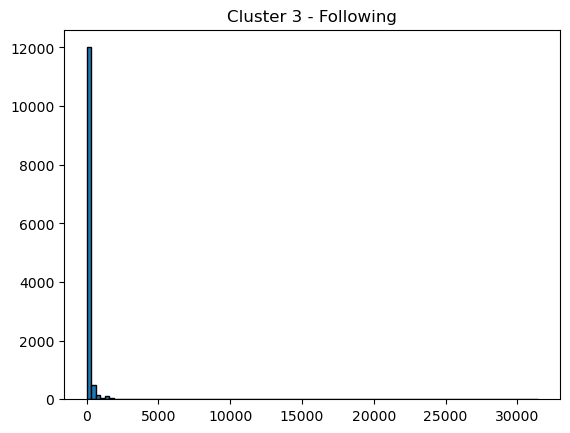

In [13]:
plt.hist(c3_train.followers, bins=100, edgecolor='black')
plt.title('Cluster 3 - Following')
plt.show()

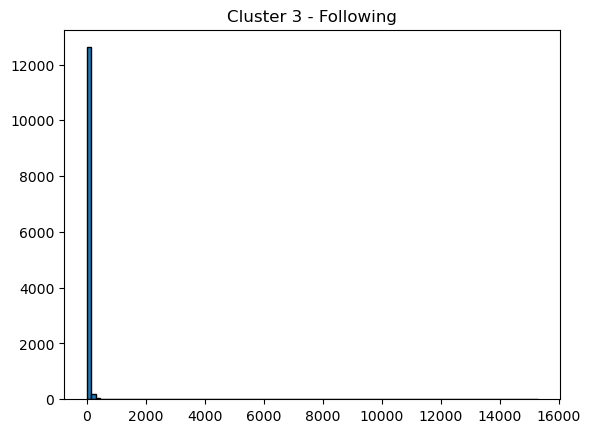

In [14]:
plt.hist(c3_train.following, bins=100, edgecolor='black')
plt.title('Cluster 3 - Following')
plt.show()

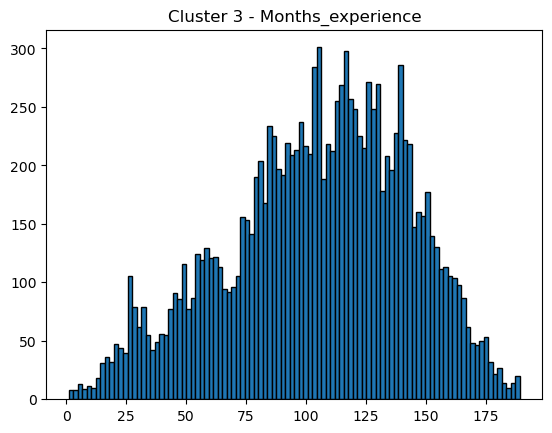

In [15]:
plt.hist(c3_train.months_experience, bins=100, edgecolor='black')
plt.title('Cluster 3 - Months_experience')
plt.show()

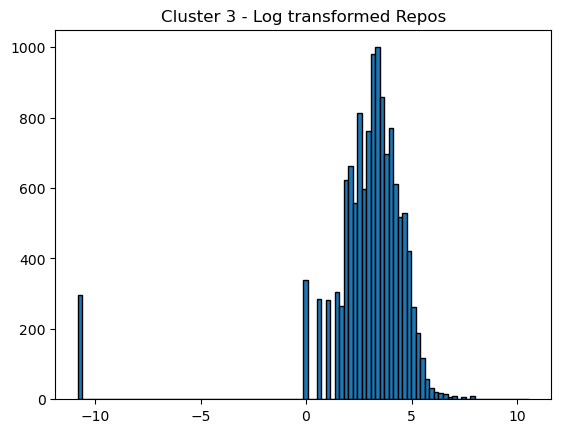

In [16]:
plt.hist(np.log(c3_train.repos+2e-5), bins=100, edgecolor='black')
plt.title('Cluster 3 - Log transformed Repos')
plt.show()

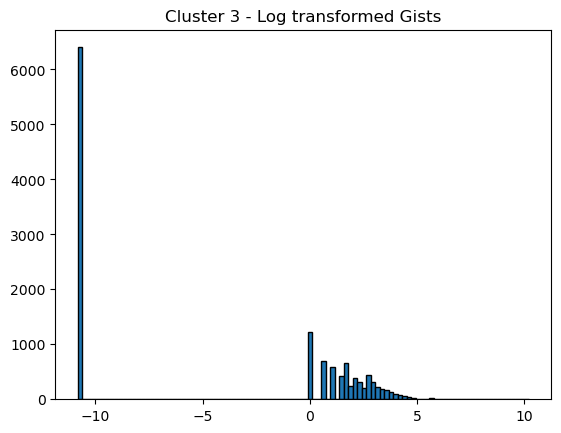

In [17]:
plt.hist(np.log(c3_train.gists+2e-5), bins=100, edgecolor='black')
plt.title('Cluster 3 - Log transformed Gists')
plt.show()

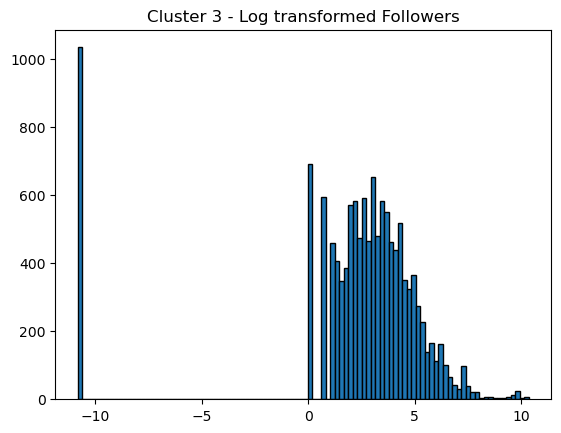

In [18]:
plt.hist(np.log(c3_train.followers+2e-5), bins=100, edgecolor='black')
plt.title('Cluster 3 - Log transformed Followers')
plt.show()

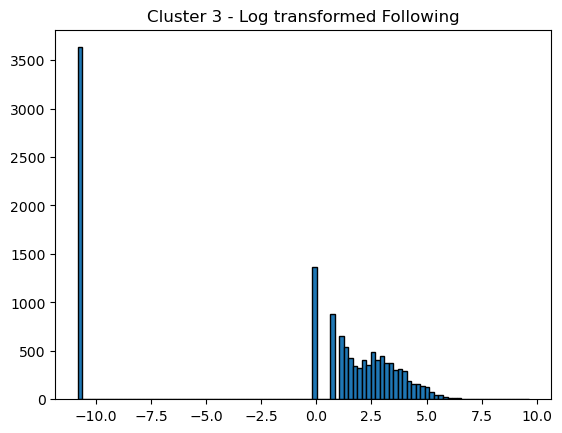

In [19]:
plt.hist(np.log(c3_train.following+2e-5), bins=100, edgecolor='black')
plt.title('Cluster 3 - Log transformed Following')
plt.show()

In [20]:
c3_train_log = c3_train.copy()
c3_train_log['repos'] = np.log(c3_train_log.repos+2e-5)
c3_train_log['gists'] = np.log(c3_train_log.gists+2e-5)
c3_train_log['followers'] = np.log(c3_train_log.followers+2e-5)
c3_train_log['following'] = np.log(c3_train_log.following+2e-5)
c3_train_log

,repos,gists,followers,following,months_experience,has_bio,is_core
0,4.948760,3.663562,4.248496,4.248496,158.660000,1,0
1,4.262680,-10.819778,3.850148,4.262680,40.240000,1,0
2,1.945913,-10.819778,1.098619,1.386299,81.250000,1,0
3,3.258097,-10.819778,7.273093,0.693157,105.180000,1,1
4,1.098619,-10.819778,-10.819778,-10.819778,124.110000,0,0
...,...,...,...,...,...,...,...
12920,3.135495,-10.819778,1.609442,-10.819778,116.698096,0,1
12921,3.178055,0.000020,1.945913,-10.819778,115.677058,0,1
12922,3.295838,1.386299,2.302587,-10.819778,114.785903,1,1
12923,3.258097,1.098619,2.197227,-10.819778,114.744561,0,1


In [ ]:
sns.pairplot(c3_train_log, hue = 'is_core')

In [ ]:
sns.pairplot(test_df, hue = 'is_core')

In [ ]:
# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(c3_train_log.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

In [ ]:
X = c3_train_log.drop('is_core', axis=1)
y = c3_train_log['is_core']

# Calculating mutual information for each feature
mi_scores = mutual_info_classif(X, y)  # For classification tasks


# Displaying the mutual information scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")

In [ ]:
X = c3_train.drop('is_core', axis=1)
y = c3_train['is_core']

# Calculating mutual information for each feature
mi_scores = mutual_info_classif(X, y)  # For classification tasks


# Displaying the mutual information scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")

In [ ]:
#scaler = StandardScaler()
#x = scaler.fit_transform(x)
#c3_adasyn_log_scaled = pd.DataFrame(x, columns=['repos', 'gists', 'followers', 'following', 'months_experience'])
#c3_adasyn_log_scaled = pd.concat([c3_adasyn_log_scaled, x2], axis = 1)
#c3_adasyn_log_scaled